### 앙상블 기법

*  voting: 전체 dataset, 다른 algorithm
    * hard voting, soft voting

* bagging: dataset에서 랜덤하게 샘플링
    * bootstrapping 분할
    * random forest: bagging의 대표적인 방법

* cf. 비정형 데이터: 딥러닝이 훨씬 좋음 but 정형 데이터(table, excel ..): 머신러닝이 나음

## HAR, Human Activity Recognition
* 사람 행동 예측
* UCI HAR 데이터셋

머신러닝을 이용한 행동 인식 연구
* 센서신호(row sensor signa)
* 특징추출(feature extraction)
* 모델학습(model training)
* 행동추론(activity inference)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])

In [41]:
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [42]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [43]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


--> 대용량 데이터임

In [77]:
X_train.columns = feature_name
X_test.columns = feature_name

X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [47]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

* 각 액션별 데이터 수

In [49]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

* 액션별 데이터의 수

In [50]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [51]:
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [52]:
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8096369189005769

* max_depth 다양하게 하기 위해 GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24]
}

In [54]:
grid_cv = GridSearchCV(dt_clf, param_grid=params, 
                       scoring='accuracy', 
                       cv=5, 
                       return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

--> 오래걸림..

* best score, best params 물어보기

In [55]:
grid_cv.best_score_, grid_cv.best_params_

(0.8543335321892183, {'max_depth': 8})

--> max_depth 8이 좋다고 함. 

In [56]:
# max depth 별로 표로 성능 정리

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


In [78]:
max_depth = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(X_train, y_train)

    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    print('Max_Depth: ', depth, ', Accuracy: ', accuracy)

Max_Depth:  6 , Accuracy:  0.8554462164913471
Max_Depth:  8 , Accuracy:  0.8734306073973532
Max_Depth:  10 , Accuracy:  0.8615541228367831
Max_Depth:  12 , Accuracy:  0.8595181540549711
Max_Depth:  16 , Accuracy:  0.8669833729216152
Max_Depth:  20 , Accuracy:  0.8652867322701052
Max_Depth:  24 , Accuracy:  0.8652867322701052


* best model

In [79]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.9205972175093315

### 랜덤 포레스트 적용

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [6, 8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [8, 12],
    'min_samples_split': [8, 12]
}

In [80]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(X_train, y_train)

/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vec

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

--> DT보다 빠름

* 결과 정리

In [81]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [82]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.914445,100,10
25,1,0.914445,100,10
29,3,0.913085,200,10
26,3,0.913085,200,10
23,5,0.912813,200,8


--> 공동 1위, 공동 3위, 5위
--> 나무 많다고 좋은 거 아님 - param_n_estimators: 나무 수
--> mean_test_score: traning data의 validation score

* best model

In [70]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [63]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [64]:
grid_cv.best_score_

0.9144450489662677

In [71]:
# test 데이터에 적용
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

/Users/jhpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [83]:
pred1 = rf_clf_best.predict(X_test)
accuracy_score(y_test, pred1)

0.9205972175093315

### 중요 특성 확인

In [67]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)

# 중요한 거 20개만 갖고옴
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034635
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026550
tGravityAcc-mean()-Y               0.026048
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012831
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011281
fBodyAccJerk-max()-X               0.011040
dtype: float64

* 주요 특성 관찰

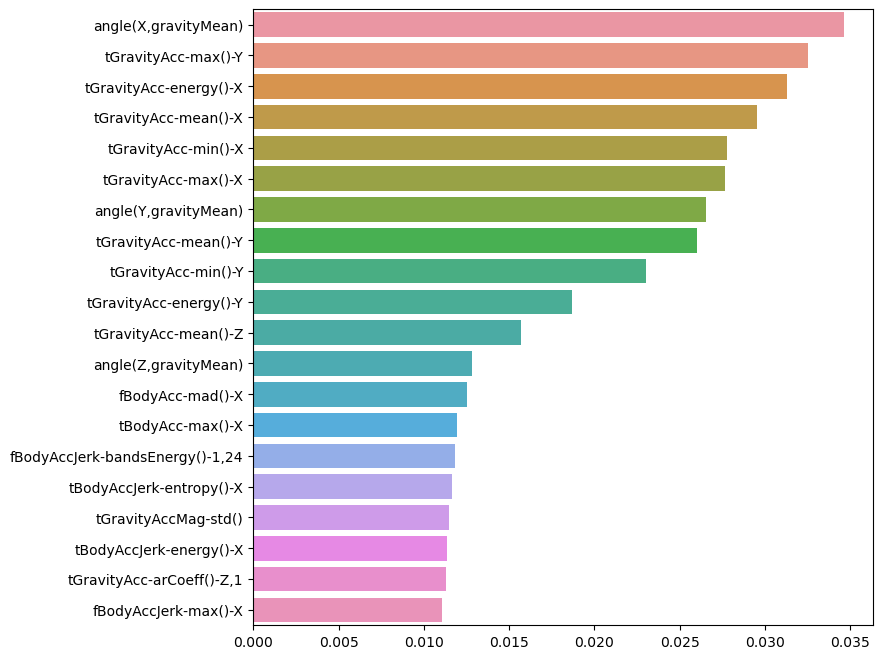

In [68]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

* 20 개 특성만 가지고 다시 성능 확인

     * 561개 특성보다 20개의 특성만 보면 연산속도 빠를 것임.

In [84]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

In [85]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)
accuracy_score(y_test, pred1_re)

0.8184594502884289